# **Training and Prediction Iteration One**

# 1. For this iteration, the model was trained on one second clips from previously categorized calls. 

In [1]:
import numpy as np 
import librosa.display
import os 
import matplotlib.pyplot as plt 
import scipy

In [2]:
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    #y, sr = librosa.load(audio_file)
    y, sr = librosa.load(audio_file, sr = 44100) # edit: changed sr so that all have the same instead of native sr 
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    direc = os.listdir(input_path)

    for i, file in enumerate(direc):
        if file.endswith('.wav'):
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_spectrogram(input_file, output_file)

In [3]:
# laugh
create_pngs_from_wavs('/Users/calzada/birdsongs/wood/01_data/clean/clean_laugh', '/Users/calzada/birdsongs/wood/01_data/spects/laugh')

In [4]:
# drum
create_pngs_from_wavs('/Users/calzada/birdsongs/wood/01_data/clean/clean_drum', '/Users/calzada/birdsongs/wood/01_data/spects/drum')

In [5]:
# pik
create_pngs_from_wavs('/Users/calzada/birdsongs/wood/01_data/clean/clean_pik', '/Users/calzada/birdsongs/wood/01_data/spects/pik')

In [6]:
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        if file.endswith('.png'):
            # added image array to list
            images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
            # label array add 
            labels.append((label))
        
    return images, labels

def show_images(images):
    num_images = len(images)
    print(num_images)
    fig, axes = plt.subplots(1, 5, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    
    for i, ax in enumerate(axes.flat):
        if i < 5:  # only plot first 5 in the dir 
            ax.imshow(images[i] / 255)
        else:
            ax.axis('off')  # Turn off empty subplots
    
    #plt.tight_layout()
    plt.show()

In [7]:
x = []
y = []

### laugh label = 0 

96


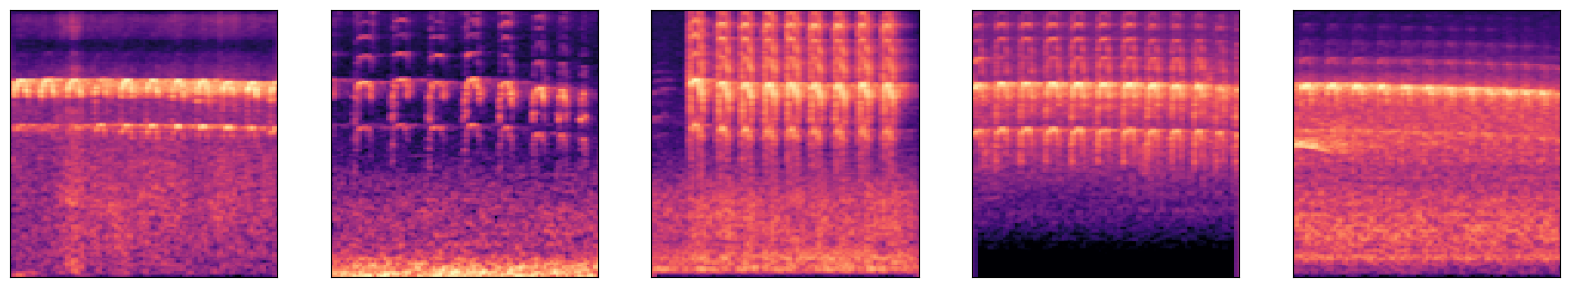

In [8]:
images, labels = load_images_from_path('/Users/calzada/birdsongs/wood/01_data/spects/laugh', 0)
show_images(images)
x += images
y += labels

In [12]:
print(x)
print(y)

[array([[[ 45.,  14.,  91.],
        [ 48.,  15.,  97.],
        [ 20.,  14.,  55.],
        ...,
        [ 27.,  16.,  67.],
        [ 60.,  14., 109.],
        [ 60.,  14., 109.]],

       [[ 48.,  15.,  97.],
        [ 51.,  16., 103.],
        [ 22.,  15.,  59.],
        ...,
        [ 29.,  17.,  71.],
        [ 64.,  15., 116.],
        [ 64.,  15., 116.]],

       [[ 55.,  14., 105.],
        [ 59.,  15., 112.],
        [ 49.,  17., 101.],
        ...,
        [ 82.,  19., 124.],
        [ 82.,  19., 124.],
        [ 82.,  19., 124.]],

       ...,

       [[166.,  50., 116.],
        [176.,  53., 123.],
        [227.,  78., 101.],
        ...,
        [158.,  47., 127.],
        [160.,  47., 127.],
        [160.,  47., 127.]],

       [[158.,  47., 118.],
        [168.,  50., 125.],
        [219.,  71., 106.],
        ...,
        [109.,  29., 129.],
        [134.,  39., 129.],
        [134.,  39., 129.]],

       [[158.,  47., 118.],
        [168.,  50., 125.],
        [219., 

### drum label = 1 

28


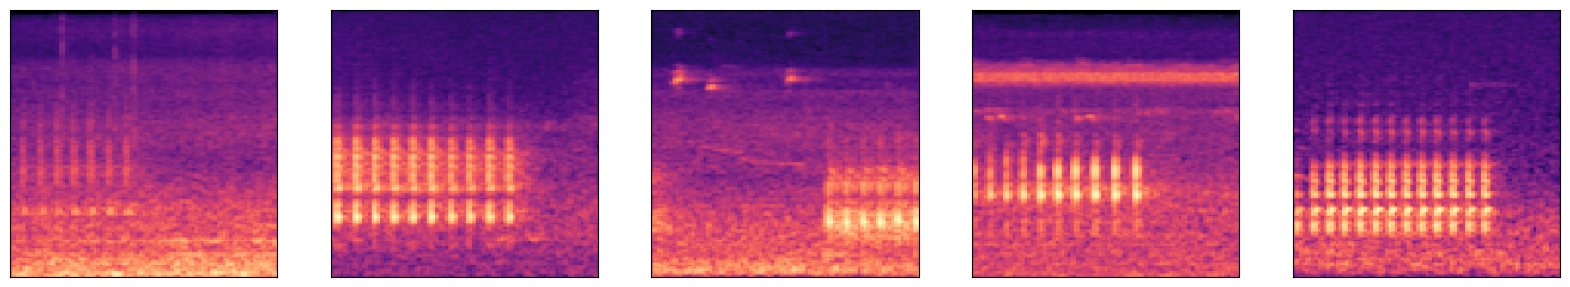

In [9]:
images, labels = load_images_from_path('/Users/calzada/birdsongs/wood/01_data/spects/drum', 1)
show_images(images)
x += images
y += labels

### pik = 2 

36


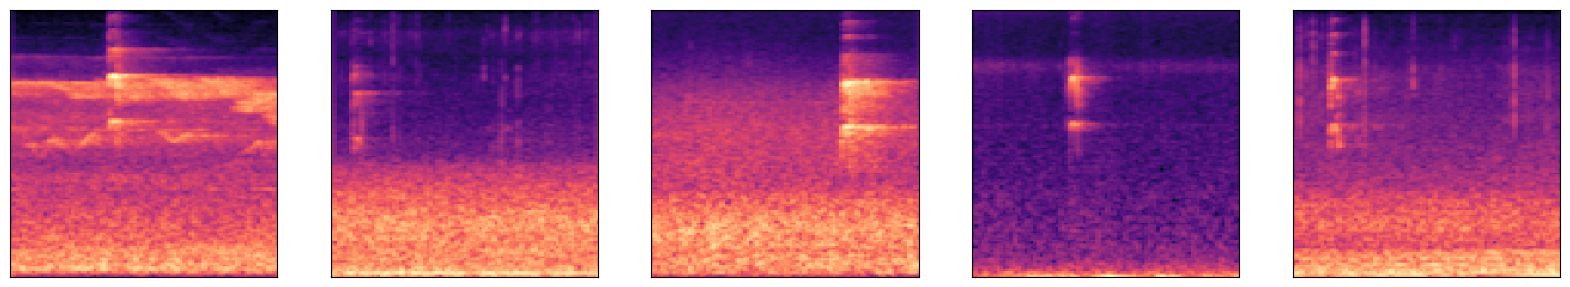

In [10]:
images, labels = load_images_from_path('/Users/calzada/birdsongs/wood/01_data/spects/pik', 2)
show_images(images)
    
x += images
y += labels

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.1, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train) # converting class labels (list of 0,1,2s to binary class matrix (one-hot encoding)
y_test_encoded = to_categorical(y_test)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax')) # 3 class linear classifier (changes 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [13]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
15/15 [==============================] - 5s 319ms/step - loss: 1.2409 - accuracy: 0.5417 - val_loss: 0.7973 - val_accuracy: 0.6250
Epoch 2/10
15/15 [==============================] - 5s 319ms/step - loss: 0.6810 - accuracy: 0.6806 - val_loss: 0.7566 - val_accuracy: 0.6250
Epoch 3/10
15/15 [==============================] - 5s 316ms/step - loss: 0.7431 - accuracy: 0.6667 - val_loss: 0.5426 - val_accuracy: 0.7500
Epoch 4/10
15/15 [==============================] - 5s 324ms/step - loss: 0.4781 - accuracy: 0.7986 - val_loss: 0.4629 - val_accuracy: 0.8125
Epoch 5/10
15/15 [==============================] - 5s 321ms/step - loss: 0.4543 - accuracy: 0.7986 - val_loss: 0.4563 - val_accuracy: 0.6875
Epoch 6/10
15/15 [==============================] - 5s 320ms/step - loss: 0.3618 - accuracy: 0.8333 - val_loss: 0.5293 - val_accuracy: 0.7500
Epoch 7/10
15/15 [==============================] - 5s 319ms/step - loss: 0.3062 - accuracy: 0.8681 - val_loss: 0.9411 - val_accuracy: 0.5625
Epoch 

[]

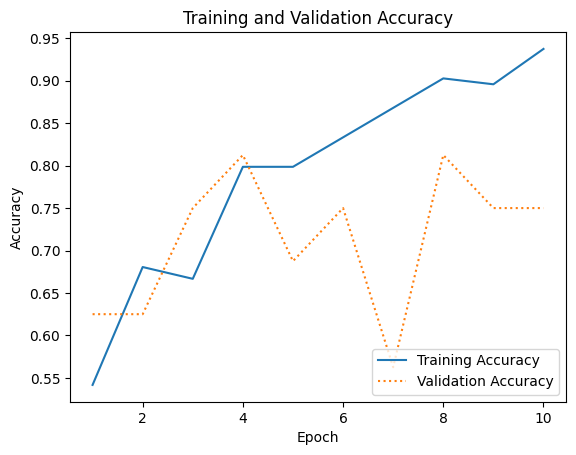

In [14]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# 2. Update model with transfer learning. MobileNetV2 is a pre-trained CNN that is optimized for mobile devices. 

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

1/1 [==============================] - 0s 149ms/step


In [16]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
15/15 [==============================] - 1s 78ms/step - loss: 37.5317 - accuracy: 0.6389 - val_loss: 3.5583 - val_accuracy: 0.9375
Epoch 2/10
15/15 [==============================] - 1s 75ms/step - loss: 0.1408 - accuracy: 0.9861 - val_loss: 1.3322 - val_accuracy: 0.9375
Epoch 3/10
15/15 [==============================] - 1s 72ms/step - loss: 0.9020 - accuracy: 0.9861 - val_loss: 3.0844 - val_accuracy: 0.9375
Epoch 4/10
15/15 [==============================] - 1s 79ms/step - loss: 4.5665e-05 - accuracy: 1.0000 - val_loss: 1.9673 - val_accuracy: 0.9375
Epoch 5/10
15/15 [==============================] - 1s 70ms/step - loss: 1.0596e-05 - accuracy: 1.0000 - val_loss: 1.8246 - val_accuracy: 0.9375
Epoch 6/10
15/15 [==============================] - 1s 70ms/step - loss: 0.0541 - accuracy: 0.9931 - val_loss: 2.3546 - val_accuracy: 0.9375
Epoch 7/10
15/15 [==============================] - 1s 72ms/step - loss: 0.0072 - accuracy: 0.9931 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


[]

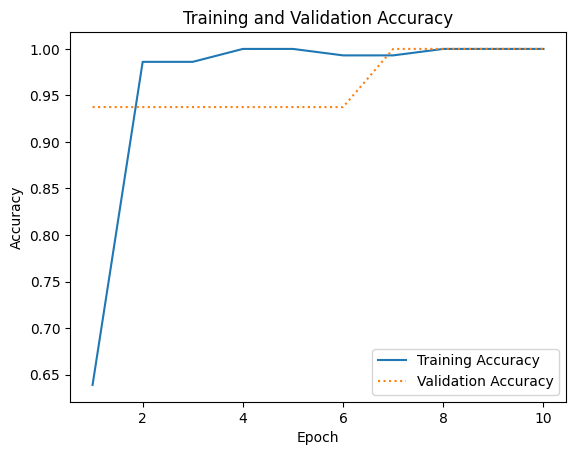

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Confusion Matrix 

1/1 [==============================] - 0s 51ms/step


Text(110.44999999999997, 0.5, 'Actual call')

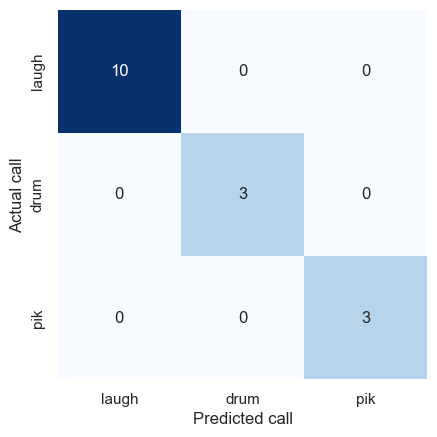

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['laugh', 'drum', 'pik']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted call')
plt.ylabel('Actual call')

# 3. Save the Model

In [20]:
model.save('./one_sec_model.h5')

/Users/calzada/miniforge3/envs/test_audio/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load in the model...

In [243]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('one_sec_model.h5')

# 4. Using the model to predict on other recordings

In [24]:
create_pngs_from_wavs('/Users/calzada/birdsongs/wood/01_data/wav_files/617182328.wav', '/Users/calzada/birdsongs/wood/01_data/validation/drum')

NotADirectoryError: [Errno 20] Not a directory: '/Users/calzada/birdsongs/wood/01_data/wav_files/617182328.wav'

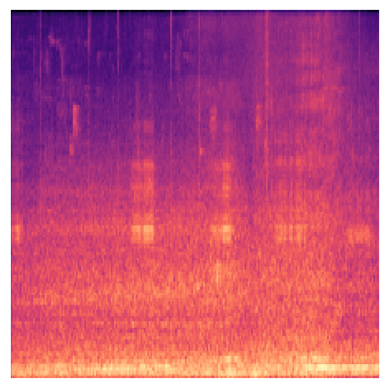

In [25]:
x = image.load_img('/Users/calzada/birdsongs/wood/01_data/validation/drum/617182328.png', target_size = (224,224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [20]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)
y = base_model.predict(x)

1/1 [==============================] - 0s 32ms/step


In [21]:
predic = model.predict(y)
for i, label in enumerate(class_labels):
    print(f'{label}: {predic[0][i]}')

type(predic)

1/1 [==============================] - 0s 38ms/step
laugh: 0.0
drum: 1.0
pik: 0.0


numpy.ndarray

In [208]:
print(predic)

[[4.2735533e-12 1.6996732e-33 1.0000000e+00]]


## 4a. Define function to predict on withheld recordings

In [21]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
import soundfile as sf
import shutil

# Function to create spectrogram and return it as NumPy array
def create_spectrogram(audio_file):
    y, sr = librosa.load(audio_file, sr = 44100)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    return log_ms, sr  # return spectrogram (log mel spec) and sample rate

# Function to preprocess spectrogram data and return as model input
def create_chunk_image_data(log_ms, sr, chunk_num):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    librosa.display.specshow(log_ms, sr=sr)
    img_file = f'temp_spec_{chunk_num}.png'
    fig.savefig(img_file)
    plt.close(fig)
    x = image.load_img(img_file, target_size=(224, 224))
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    os.remove(img_file)
    return x

# predict on each chunk/window
def predict_chunk(x):
    #prediction = base_model.predict(chunk)
    y = base_model.predict(x)
    pred = model.predict(y)
    print(pred)
    return pred

# Function to process WAV file with sliding window and overlap
def process_wav_with_overlap(wav_file, output_path, chunk_size=1.0, overlap=0.5):
    # load in wav file
    y, sr = librosa.load(wav_file, sr=None)
    print(f'len(y): {len(y)}, sr (Hz): {sr}, duration (s): {len(y)/sr}')

    # Calculate parameters: sample num and hop size
    chunk_size_samples = int(chunk_size * sr)  # convert chunk size from seconds to # samples
    print(f'chunk size: {chunk_size_samples}')
    
    hop_size = int(chunk_size_samples * (1 - overlap))  # hop size based on overlap percentage
    print(f'hop size: {hop_size}')
    
    # Initialize predictions dictionary    
    class_predictions = {
        'laugh' : [], 
        'drum' : [], 
        'pik' : []
    }
    
    if os.path.exists(output_path):
        # Clear the directory if it exists
        shutil.rmtree(output_path)
        os.makedirs(output_path)
    else:
        # Create the directory if it does not exist
        os.makedirs(output_path)
    
    chunk_num = 0
    i = 0
    
    # Process the WAV file with sliding window and overlap
    #while i < len(y) - chunk_size_samples + 1:
    while i + chunk_size_samples <= len(y): # execute until we get to the end/about the end of the recording  

        # Extract the current chunk
        # this is currently an array but need as fp of wav further down
        chunk = y[i:i + chunk_size_samples] 
        
        # export the chunk wav to a temporary chunk dir 
        chunk_file = os.path.join(output_path, f'chunk_{chunk_num}.wav')
        sf.write(chunk_file, chunk, sr)
        
        length = len(chunk)
        duration = length / sr
    
        print(f"{chunk_file} has dur = {duration} s, length = {length}, sr = {sr}")
        
        # Create spectrogram for the chunk
        log_ms, _ = create_spectrogram(chunk_file)

        # Preprocess spectrogram data for model input
        x = create_chunk_image_data(log_ms, sr, chunk_num)

        # Make prediction for the chunk
        chunk_prediction = predict_chunk(x)
        #print(prediction)

        # Store or process the prediction as needed
        class_predictions['laugh'].append(chunk_prediction[0][0])  # indexing based on call number set above
        class_predictions['drum'].append(chunk_prediction[0][1])
        class_predictions['pik'].append(chunk_prediction[0][2])
        
        chunk_num += 1 
        i += hop_size # increase i (window) by hop_size calculated above
    
    return class_predictions

# 5. Predicting on unseen sample recordings...

## sample 1: laugh

In [22]:
wav_file1 = '/Users/calzada/birdsongs/wood/01_data/wav_files/519469951.wav'
output_path = os.path.join(os.getcwd(), 'test_chunk_wavs')
print(output_path)

/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs


In [23]:
pred1 = process_wav_with_overlap(wav_file1, output_path, chunk_size=1, overlap=0.5)

len(y): 109049, sr (Hz): 48000, duration (s): 2.2718541666666665
chunk size: 48000
hop size: 24000
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_0.wav has dur = 1.0 s, length = 48000, sr = 48000
1/1 [==============================] - 0s 147ms/step
[[1. 0. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_1.wav has dur = 1.0 s, length = 48000, sr = 48000
1/1 [==============================] - 0s 27ms/step
[[1. 0. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav has dur = 1.0 s, length = 48000, sr = 48000
1/1 [==============================] - 0s 30ms/step
[[1. 0. 0.]]


In [29]:
chunk_wave_dir = '/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs'
chunks = [os.path.join(chunk_wave_dir, x) for x in os.listdir(chunk_wave_dir) if x.endswith('.wav')]
print(chunks)

['/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_1.wav', '/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_0.wav', '/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav']


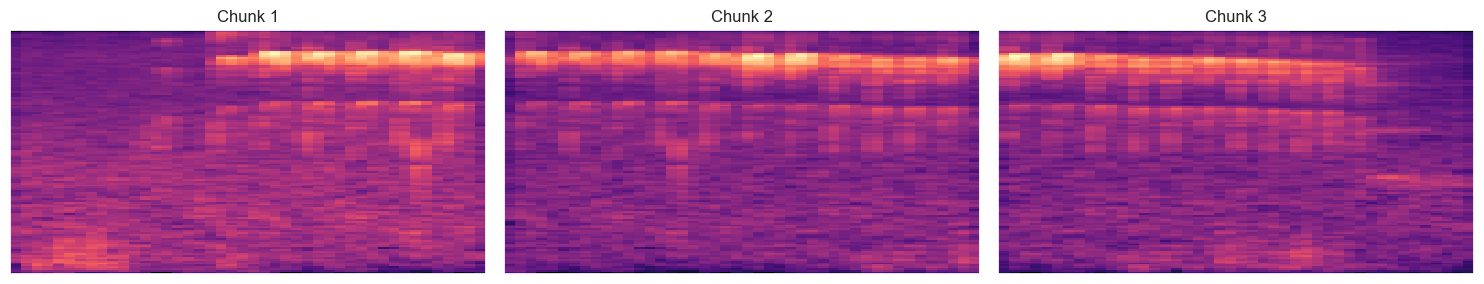

In [30]:
num_chunks = len(chunks)
fig, axes = plt.subplots(1, num_chunks, figsize=(15,3))  # Adjust figsize as needed

for i, chunk in enumerate(sorted(chunks)): 
    # load chunk signal and sr, and construct mel spectrogram (ms) and log ms
    y, sr = librosa.load(chunk)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    
    # display spectrogram on corresponding axis
    librosa.display.specshow(log_ms, sr=sr, ax=axes[i])
    
    axes[i].set_title(f'Chunk {i + 1}')  # Set title for each subplot

plt.tight_layout()  
#plt.show()

## Play a sliding window chunk

In [27]:
from pydub.playback import play 
import IPython.display as ipd
path = '/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav'
ipd.Audio(path)

## Plot of predictions for each window

### Define function to plot prediction

In [24]:
def plot_predictions(pred_dict, fig_size = (15,5)):
    
    # get range of samples (all classes should have the same) 
    x_values = range(len(pred_dict['laugh']))
    
    # plot
    plt.figure(figsize = fig_size)
    
    # plot each class
    plt.plot(x_values, pred_dict['laugh'], label='laugh', marker='o', linestyle='-')
    plt.plot(x_values, pred_dict['drum'], label='drum', marker='s', linestyle='-')
    plt.plot(x_values, pred_dict['pik'], label='pik', marker='^', linestyle='-.')
    
    plt.xlabel('Window/Index')
    plt.ylabel('Probability')
    plt.title('Probability Time Series for Each Class')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

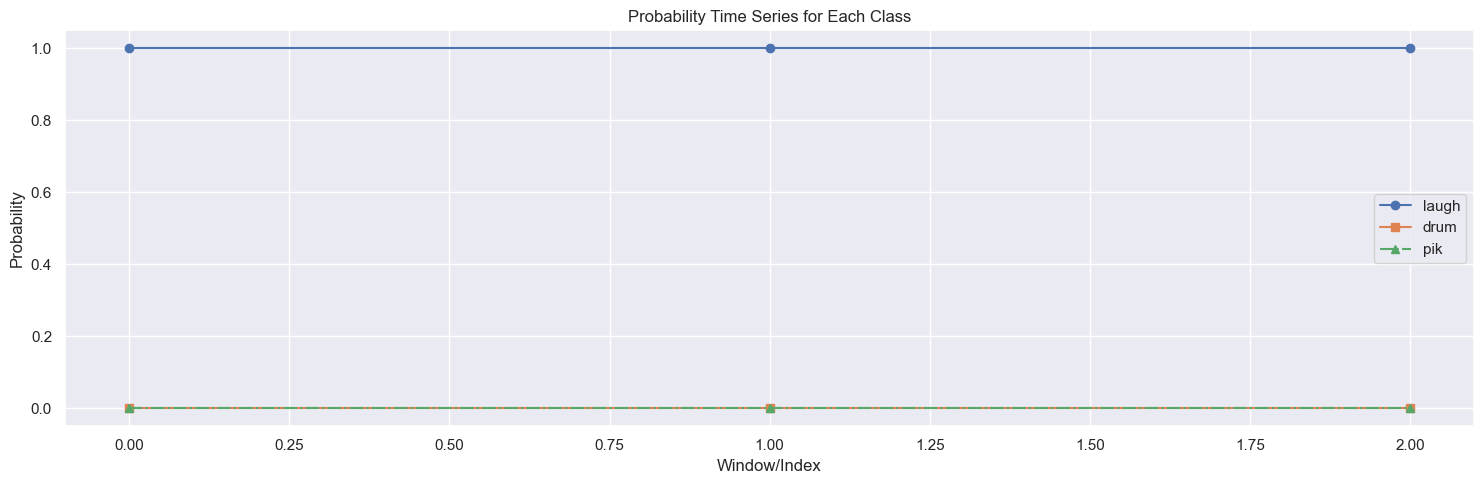

In [25]:
plot_predictions(pred1)

## Sample 2: drum @ 6-7s mark

In [26]:
wav_file2 = '/Users/calzada/birdsongs/wood/01_data/wav_files/518043091.wav'

In [27]:
pred2 = process_wav_with_overlap(wav_file2, output_path, chunk_size = 1, overlap=0.0)

len(y): 803904, sr (Hz): 44100, duration (s): 18.229115646258503
chunk size: 44100
hop size: 44100
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_0.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 31ms/step
[[0. 0. 1.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_1.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 30ms/step
[[0. 0. 1.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 32ms/step
[[0. 0. 1.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_3.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 31ms/step
[[0. 0. 1.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_4.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 37ms/step
[[0. 0. 1.]]
/Users/calzada/birdso

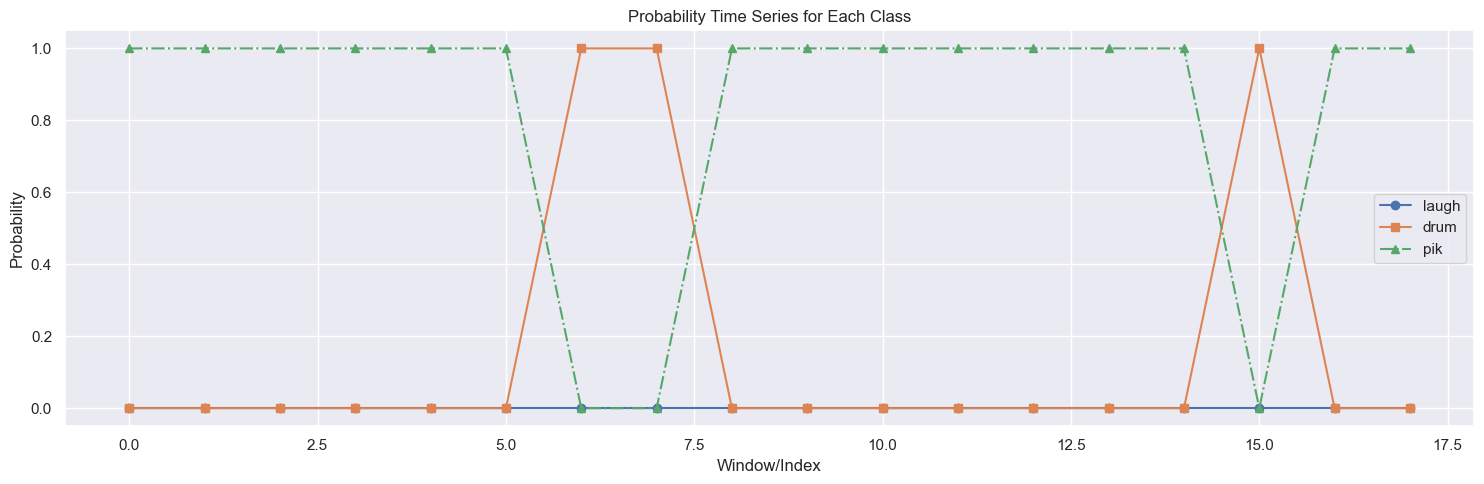

In [28]:
plot_predictions(pred2)

## sample 3: piks 

In [33]:
wav_file3 = '/Users/calzada/birdsongs/wood/01_data/wav_files/518227531.wav'
pred3 = process_wav_with_overlap(wav_file3, output_path, overlap=0.5)

len(y): 2648148, sr (Hz): 48000, duration (s): 55.16975
chunk size: 48000
hop size: 24000
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_0.wav has dur = 1.0 s, length = 48000, sr = 48000
1/1 [==============================] - 0s 23ms/step
[[0.000000e+00 6.465975e-16 1.000000e+00]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_1.wav has dur = 1.0 s, length = 48000, sr = 48000
1/1 [==============================] - 0s 30ms/step
[[0. 0. 1.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav has dur = 1.0 s, length = 48000, sr = 48000
1/1 [==============================] - 0s 29ms/step
[[0. 0. 1.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_3.wav has dur = 1.0 s, length = 48000, sr = 48000
1/1 [==============================] - 0s 29ms/step
[[0. 0. 1.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_4.wav has dur = 1.0 s, length = 48000, sr = 48000
1/1 [==============================] - 0s 29ms/step
[[0. 0. 1.]]


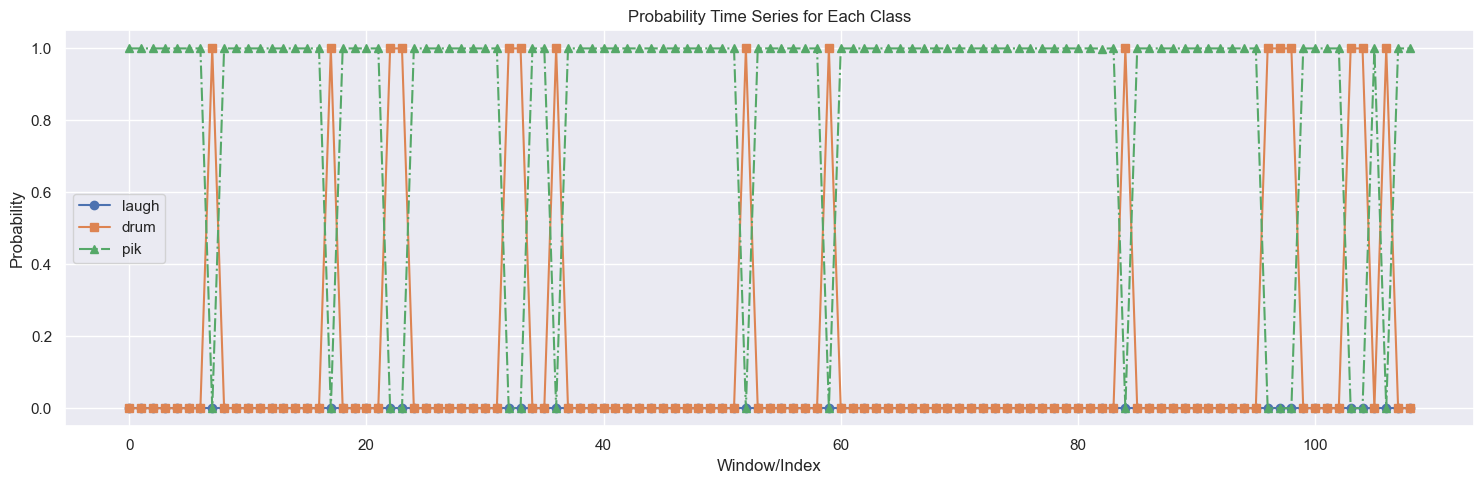

In [34]:
plot_predictions(pred3)

## sample 4: 

In [221]:
wav_file4 = '/Users/calzada/birdsongs/wood/01_data/wav_files/514927051.wav'
pred4 = process_wav_with_overlap(wav_file4, output_path, overlap=0.0)

len(y): 4436638, sr (Hz): 192000, duration (s): 23.107489583333333
chunk size: 192000
hop size: 192000
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_0.wav has dur = 1.0 s, length = 192000, sr = 192000
1/1 [==============================] - 0s 51ms/step
[[0.000000e+00 9.999999e-01 9.635690e-08]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_1.wav has dur = 1.0 s, length = 192000, sr = 192000
1/1 [==============================] - 0s 52ms/step
[[0. 1. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav has dur = 1.0 s, length = 192000, sr = 192000
1/1 [==============================] - 0s 24ms/step
[[0. 0. 1.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_3.wav has dur = 1.0 s, length = 192000, sr = 192000
1/1 [==============================] - 0s 52ms/step
[[0.0000000e+00 9.9999964e-01 3.1675239e-07]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_4.wav has dur = 1.0 s, length = 192000, sr = 192000
1/1 [====

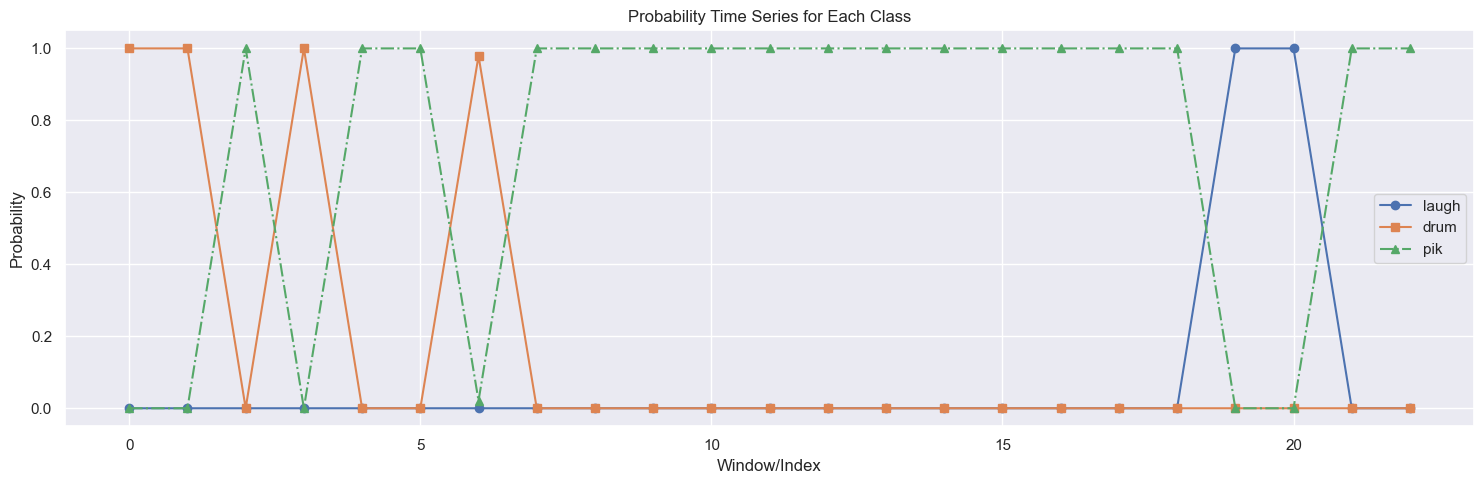

In [222]:
plot_predictions(pred4)

len(y): 1218132, sr (Hz): 44100, duration (s): 27.622040816326532
chunk size: 44100
hop size: 22050
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_0.wav has dur 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 29ms/step
[[0. 1. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_1.wav has dur 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 29ms/step
[[0. 1. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav has dur 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 29ms/step
[[1. 0. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_3.wav has dur 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 28ms/step
[[1. 0. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_4.wav has dur 1.0 seconds, length: 44100, sr = 44100
1/1 [==============================] - 0s 28ms/step
[[0.000000e+00 7.6

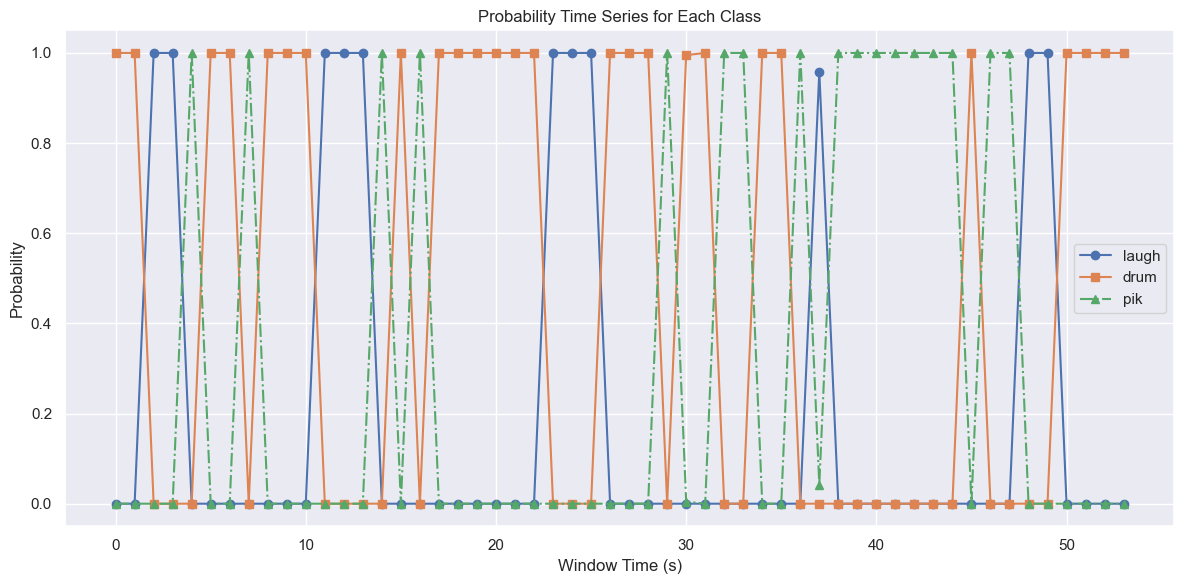

In [80]:
wav_file5 = '/Users/calzada/birdsongs/wood/01_data/wav_files/619639898.wav'
pred5 = process_wav_with_overlap(wav_file5, output_path, overlap=0.5)

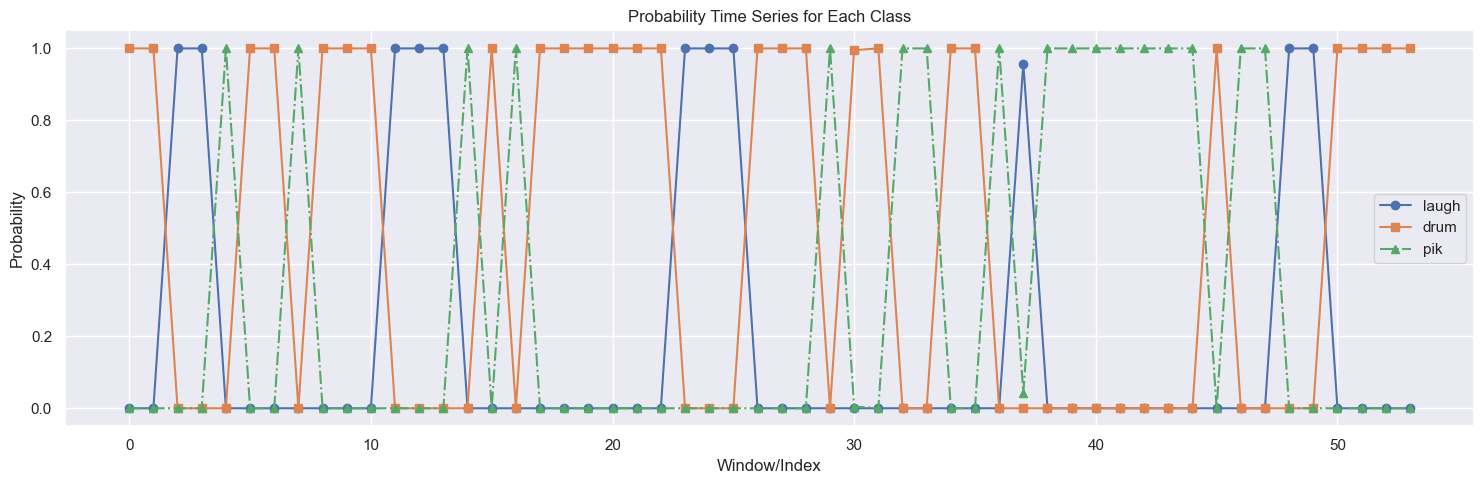

In [334]:
plot_predictions(pred5, (15,5))

In [223]:
wav_file6 = '/Users/calzada/birdsongs/wood/01_data/wav_files/619601763.wav'
pred6 = process_wav_with_overlap(wav_file6, output_path, overlap=0.5)

len(y): 795998, sr (Hz): 44100, duration (s): 18.04984126984127
chunk size: 44100
hop size: 22050
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_0.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 76ms/step
[[7.004947e-16 0.000000e+00 1.000000e+00]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_1.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 57ms/step
[[0. 1. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 34ms/step
[[0. 1. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_3.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 25ms/step
[[0. 1. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_4.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 70ms/step
[[0. 

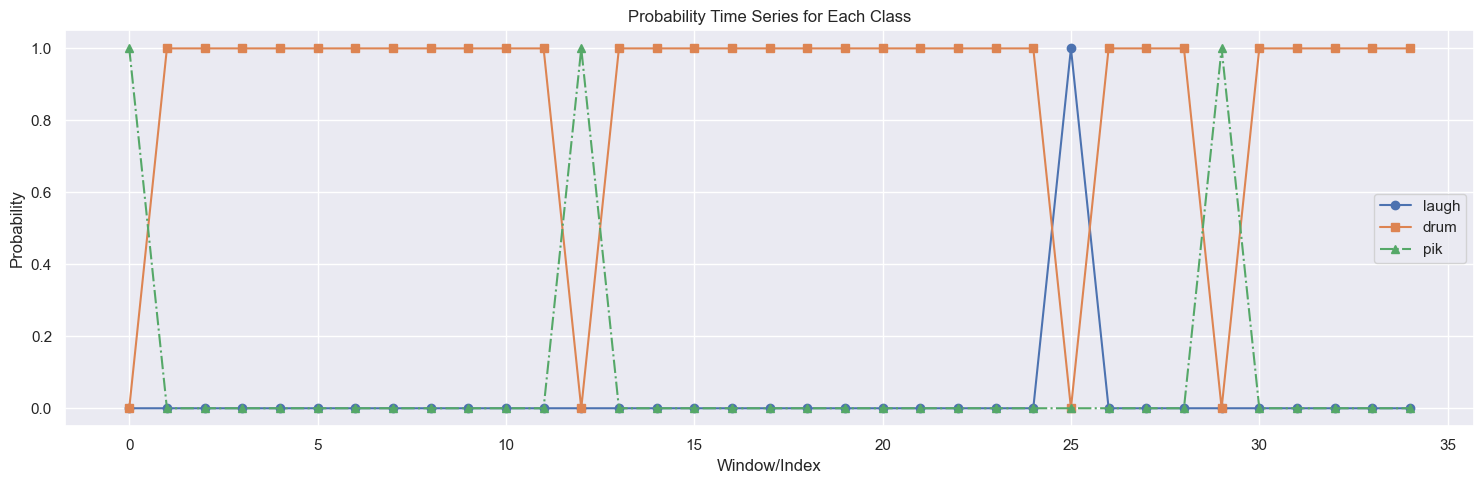

In [262]:
plot_predictions(pred6)

In [230]:
wav_file7 = '/Users/calzada/birdsongs/wood/01_data/wav_files/618507989.wav'
pred7 = process_wav_with_overlap(wav_file7, output_path, overlap=0.0)

len(y): 246272, sr (Hz): 44100, duration (s): 5.584399092970521
chunk size: 44100
hop size: 44100
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_0.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 23ms/step
[[0. 0. 1.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_1.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 22ms/step
[[1. 0. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 25ms/step
[[1.0000000e+00 0.0000000e+00 3.8518498e-36]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_3.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 35ms/step
[[1. 0. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_4.wav has dur = 1.0 s, length = 44100, sr = 44100
1/1 [==============================] - 0s 53ms/step
[[

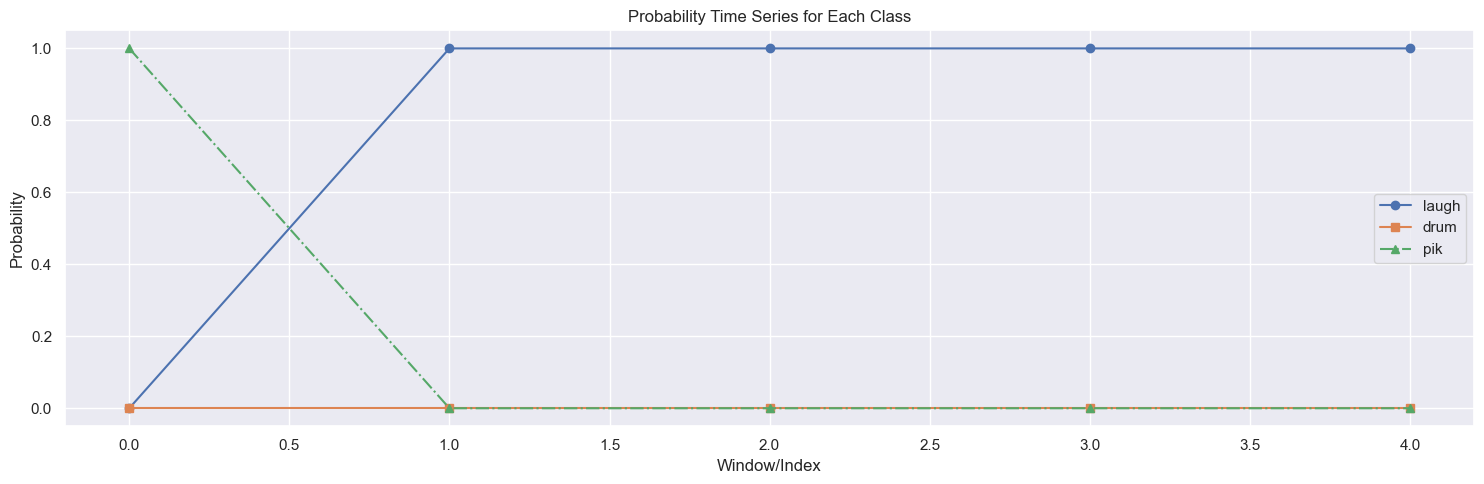

In [248]:
plot_predictions(pred7)

In [232]:
print(pred7)

{'laugh': [0.0, 1.0, 1.0, 1.0, 1.0], 'drum': [0.0, 0.0, 0.0, 0.0, 0.0], 'pik': [1.0, 0.0, 3.8518498e-36, 0.0, 0.0]}


## All three calls in one recording (ML282354581)

In [343]:
wav_file8 = '/Users/calzada/birdsongs/wood/01_data/wav_files/282354581.wav'
pred8 = process_wav_with_overlap(wav_file8, output_path, overlap=0.0)

len(y): 232456, sr (Hz): 16000, duration (s): 14.5285
chunk size: 16000
hop size: 16000
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_0.wav has dur = 1.0 s, length = 16000, sr = 16000
1/1 [==============================] - 0s 25ms/step
[[1. 0. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_1.wav has dur = 1.0 s, length = 16000, sr = 16000
1/1 [==============================] - 0s 23ms/step
[[1.062926e-19 0.000000e+00 1.000000e+00]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_2.wav has dur = 1.0 s, length = 16000, sr = 16000
1/1 [==============================] - 0s 38ms/step
[[1. 0. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_3.wav has dur = 1.0 s, length = 16000, sr = 16000
1/1 [==============================] - 0s 46ms/step
[[1. 0. 0.]]
/Users/calzada/birdsongs/wood/02_train/test_chunk_wavs/chunk_4.wav has dur = 1.0 s, length = 16000, sr = 16000
1/1 [==============================] - 0s 23ms/step
[[1.0000000e+00

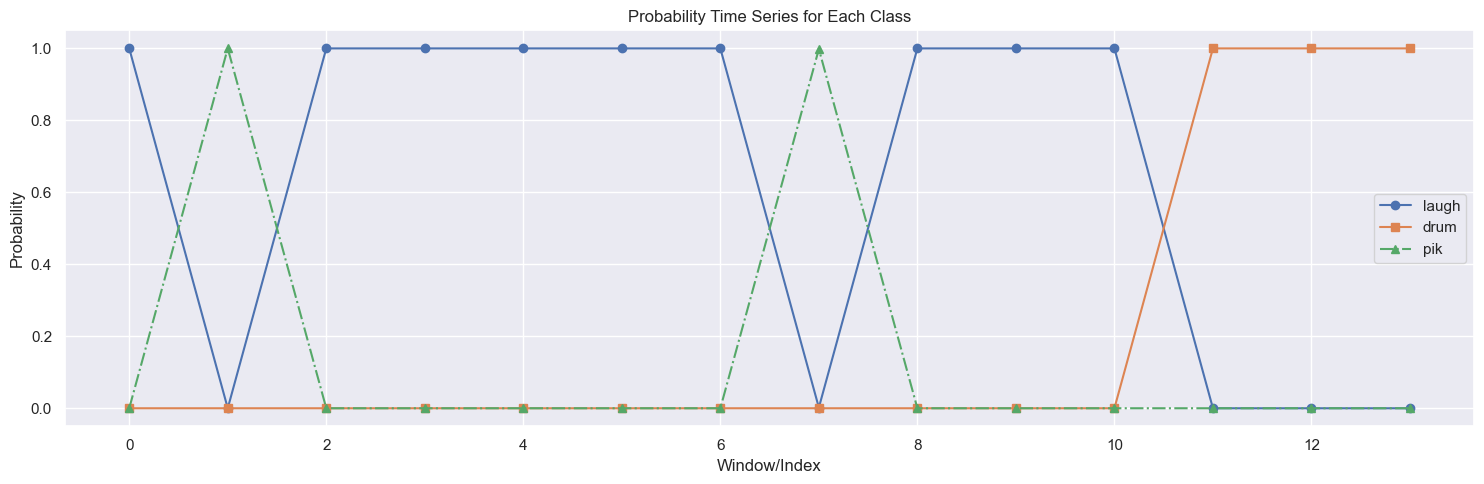

In [344]:
plot_predictions(pred8)

In [341]:
prediction_composition(pred8)

{'laugh': 0.6666667, 'drum': 0.33333334, 'pik': 2.3585546e-15}

# 6. **Observations about predictions on recordings:**
> - white noise is frequently categorized as piks (makes sense as much of the training data for piks are one single pik surrounded by blank noise)
> - may need to construct a new 'noise' class to help
> - or, could filter samples to be a certain length (<15s) so that there isn't that big of a chance of having a lot of white noise in between true calls

# Let's quantify a composition for each recording that has been predicted.  

# 7. Calculate average probability for each call category:

In [259]:
def prediction_composition(pred_iter):
    pred_comp = {}
    for call in pred_iter:
        vals = pred_iter[call] # list of values per call type
        mean_val = np.mean(vals) # calculate average probability for each call type in recording
        pred_comp[call] = mean_val # set dictionary value equal to the calculated mean 
    return pred_comp

In [267]:
prediction_composition(pred1)

{'laugh': 1.0, 'drum': 0.0, 'pik': 0.0}

In [271]:
prediction_composition(pred2)

{'laugh': 5.6933783e-25, 'drum': 0.16666667, 'pik': 0.8333333}